<a href="https://colab.research.google.com/github/vcolonnas25/Maestria/blob/main/Semana%201/S1TC1_arboles_ensamblajes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt

In [ ]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [ ]:
# Celda 1.1
mean_season = bikes.groupby('season').total.mean()

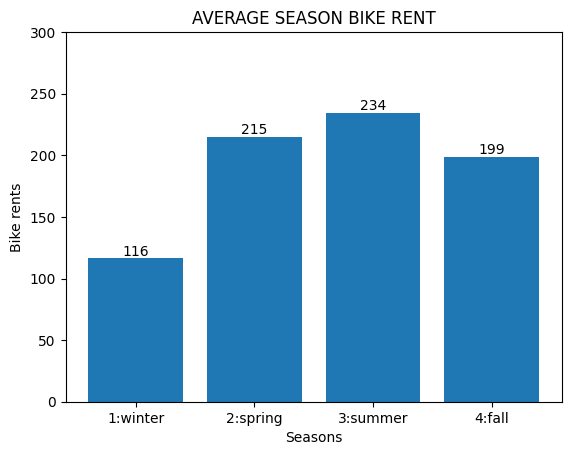

In [ ]:
# Obtenemos una gráfica de la media de las bicicletas rentadas por estacionalidad
fig, ax = plt.subplots()
bar_container = ax.bar(["1:winter", "2:spring", "3:summer", "4:fall"], mean_season)
ax.set(ylabel='Bike rents', xlabel='Seasons',title='AVERAGE BIKE RENT BY SEASON', ylim=(0, 300))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

In [ ]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


**Análisis de los datos**

Se observa que con un promedio de 234 bicicletas, la temporada donde se arriendan la mayor cantidad de bicicletas es en verano. Esto debido a que el clima se acentúa más durante esta epoca del año y hace posible realizar esta actividad. Inclusive se puede observar que la mayor cantidad de arriendos, que equivalen a 977 bicicletas, ocurrió durante el verano. Por otro lado, la temporada con menor arriendo de bicicletas es invierno con un promedio de 116 bicicletas y un máximo de 801 bicicletas arrendadas. Para esta epoca del año es muy dificil debido al clima utilizar este medio de transporte por lo cual los programas de arrendamiento de bicicletas deben buscar nuevas estrategias para ejecutar durante esta epoca del año.
1:winter, 2:spring, 3:summer, 4:fall

In [ ]:
# Celda 1.2
mean_hour = bikes.groupby('hour').total.mean()

In [ ]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


**Análisis de los datos**

Realizando un análisis de datos, se puede observar que los picos máximos de arriendo de biciletas se dan a las 8 de la mañana y a las 5 y 6 de la tarde, esto se puede relacionar a que las personas arriendan su medio de transporte para dirigirse al trabajo, escuela, universidad, etc. que generalmente los horarios son de 8am-5pm  o de 8am-6pm. El máximo ocurre a las 6:00p.m. con un total de 977 bicicletas arrendadas.Por otro lado en promedio 362 bicicletas son arrendadas a las 8am, mientras que a las 5 y 6 de la tarde en promedio se arriendan 468 y 430 bicicletas respectivamente.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

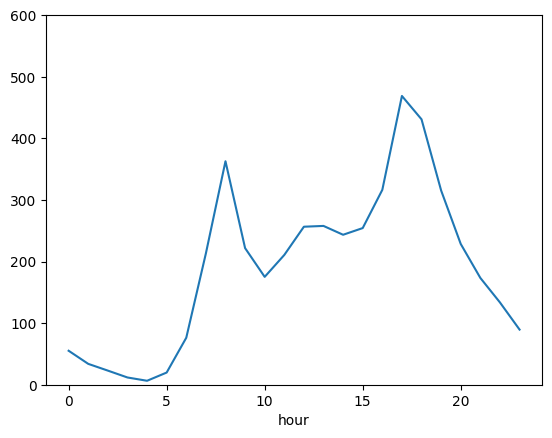

In [ ]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot(ylim=(0, 600))

<Axes: xlabel='hour'>

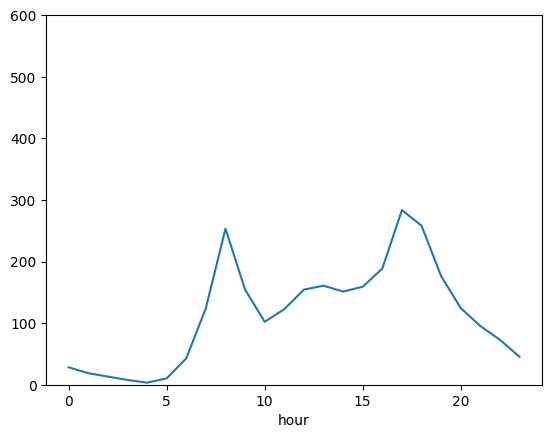

In [ ]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes.season==1].groupby('hour').total.mean().plot(ylim=(0, 600))


<Axes: xlabel='hour'>

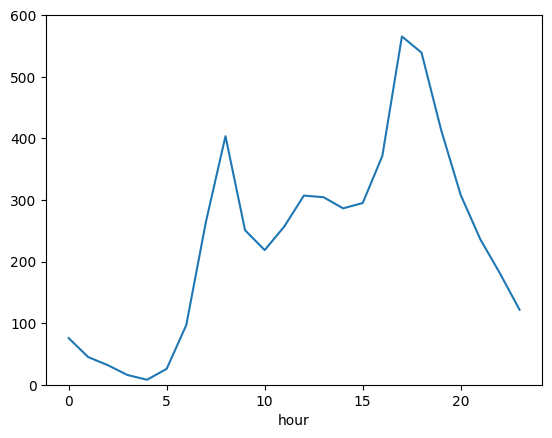

In [ ]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes.season==3].groupby('hour').total.mean().plot(ylim=(0, 600))

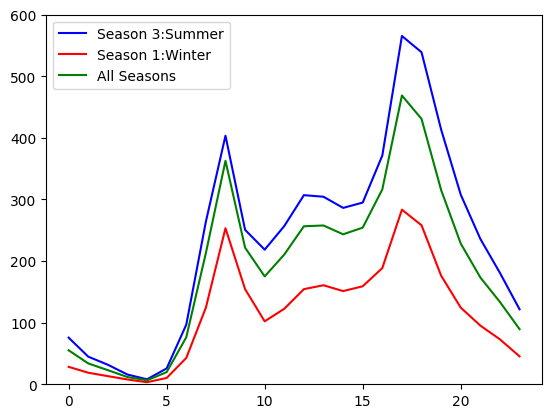

In [42]:
# Gráfica 1: season=3
plt.plot(bikes[bikes.season==3].groupby('hour').total.mean(), color='blue', label='Season 3:Summer')

# Gráfica 2: season=1
plt.plot(bikes[bikes.season==1].groupby('hour').total.mean(), color='red', label='Season 1:Winter')

# Gráfica 3: Todas las estaciones
plt.plot(bikes.groupby('hour').total.mean(), color='green', label='All Seasons')

# Configuración de la leyenda y el eje y
plt.legend()
plt.ylim(0, 600)

# Mostrar la gráfica resultante
plt.show()

**Análisis de datos**

Se puede observar en la gráfica del promedio de número de bicicletas rentadas para cada hora en cada estacionalidad, un comportamiento similar, con los mismos picos de horas de arrendamiento tanto en verano, en invierno y en el promedio de todas las estaciones, lo unico que varia es la cantidad de bicicletas arrendadas. En verano se tiene la mayor cantidad de bicicletas en arriendo, mientras que en invierno se encuentra el promedio por debajo del promedio total de todas las estacionalidades. El promedio de bicicletas que son arrendadas a las 4 am para todas las estacionalidades es muy bajo. Por esta razón, se reafirma la hipotesis de que los picos ocurren a las 8 am y 5-6 pm debido a que es el momento en donde las personas salen de sus casas y vuelven de sus trabajos, escuelas, universidades, etc.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [61]:
#Celda 3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Separamos los datos de Season, Hour y Total
data = bikes[['season','hour','total']]

# Ahora debemos convertir la variable Season, para ello primero debemos crear una instancia de OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Luego realizamos la codificación One-Hot de la variable "season"
season_encoded = encoder.fit_transform(data['season'].values.reshape(-1, 1))

data[["winter","spring","summer","fall"]] = season_encoded
data = data[["winter","spring","summer","fall","hour","total"]]


XTrain, XTest, yTrain, yTest = train_test_split(data.loc[:,data.columns != 'total'], data['total'],test_size=0.33, random_state=0)

In [72]:
from sklearn.metrics import mean_squared_error, roc_curve, auc

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(XTrain, yTrain)

# Realizar las predicciones sobre los datos de entrenamiento y evaluación
y_train_pred = model.predict(XTrain)
y_test_pred = model.predict(XTest)

# Calcular el MSE para los datos de entrenamiento y evaluación
mse_train = mean_squared_error(yTrain, y_train_pred)
mse_test = mean_squared_error(yTest, y_test_pred)

print("MSE para datos de entrenamiento:", mse_train)
print("MSE para datos de evaluación:", mse_test)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes: ', model.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Variable Independiente: ', model.intercept_)


MSE para datos de entrenamiento: 25406.128093199288
MSE para datos de evaluación: 25644.421108938277
Coeficientes:  [-76.79345561  24.11431232  42.2252086   10.45393469  10.62873885]
Variable Independiente:  67.23038434133244


In [74]:
# evaluación del modelo
print("Root Mean squared error: %.2f" % np.sqrt(np.mean((model.predict(XTrain) - yTrain) ** 2)))

Root Mean squared error: 159.39


**Análisis de datos**

winter	spring	summer	fall	hour	total

En este caso, las limitaciones de la regresión lineal para este caso es que asume que la relación entre las variables predictoras y la variable de respuesta es lineal. Sin embargo, esta suposición para el caso de la variable categórica "season", la relación con la variable de respuesta se puede ver en la gráfica que no es lineal. Sin embargo, podemos sacar algunas observaciones de los resultados:

El modelo quedo de la siguiente forma:

*-76.79345561 (winter) + 24.11431232 (spring)  + 42.2252086 (summer) +  10.45393469 (fall) + 10.62873885 (hour) +  67.23 = Total*


Teniendo en cuenta los análisis que se realizaron anteriormente, la variable Winter y Total eran inversamente proporcional tal como se percibe en el modelo en donde desmuestra que el arriendo de bicicletas disminuye en invierno. Por otro lado, para la variable Summer son directamente proporcional y tiene el coeficiente que mayor impacta el total por lo cual en Verano mayor arriendos de bicicletas se tendrán. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [ ]:
# Celda 4


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [ ]:
# Celda 5


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

In [ ]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [ ]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9